# Analysis PLan 
 
Writing a Data Scientist Blog Post

      using
                 
Cross-Industry Standard Process of Data Mining - (CRISP-DM)

## A. Bussiness Understanding                 
     1. Formulate research/analysis question(s)
## B. Data Understanding
     1. Seek for relevant datasets
     2. Download relevant datasets
## C. Data preparation
    1. Data Exploration
    2. Cleaning data
    3. Features extraction and engineering
    4. Exploratory data analysis
## D. Analysis and Modelling
    1. Answers to research/analysis question(s)
    2. Supervised learning: Predicting prices
## E. Deployment
    1. Summary report
    2. Conclusion(s)
    



## A. Bussiness Understanding                 
###       1. Formulate research/analysis question(s)

* Question I
   - Where are the Airbnb rooms in New York City?
      -  Analyzing the distribution of Airbnb listing in the 5 boroughs of NYC.
* Question II
  - Where is the most affordable best Airbnb rooms in New York using average price in each borough.
    -  Analyzing the distribution of Airbnb average prices in the 5 boroughs of NYC.
* Question III
  - What is the most popular and affordable Airbnb rooms in each New York borough
    - Finding the average prices of Airbnb rooms according to room types in each NYC borough.
* Question IV
  - What are the major determinants of prices of rooms in New York Airbnb 
    - Finding factors that positively and negatively impact the price of Airbnb rooms in NYC using linear regression analysis.

## B. Data Understanding
###     1. Seek for relevant datasets
* Our dataset comes for publicly available  Airbnb and New York State Department of Health websites
###     2. Download relevant datasets
    - Download datasets from Airbnb data using the [url](http://data.insideairbnb.com/united-states/ny/new-york-city/2020-02-12/data/listings.csv.gz)

In [112]:
# Import necessary packages.
import os
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor 
from sklearn.pipeline import Pipeline
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from math import log, log10
sns.set(style="ticks", color_codes=True)
plt.rc('figure', figsize=[10,12], dpi=100)


In [2]:
airbnb = "http://data.insideairbnb.com/united-states/ny/new-york-city/2020-02-12/data/listings.csv.gz"
data = pd.read_csv(airbnb)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## C. Data preparation
###    1. Data Exploration


In [3]:
data.shape

(51097, 106)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51097 entries, 0 to 51096
Columns: 106 entries, id to reviews_per_month
dtypes: float64(21), int64(21), object(64)
memory usage: 41.3+ MB


In [5]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [6]:
data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 106, dtype: object

In [7]:
# explore in depth each feature, and select features of interest
for i in range(0,len(data.columns),5):
    n = i + 5
    print(data.iloc[:,i:n].head())
    print(data.iloc[:,i:n].info(), end="\n\n\n\n")


     id                        listing_url       scrape_id last_scraped  \
0  2595  https://www.airbnb.com/rooms/2595  20200212052319   2020-02-12   
1  3831  https://www.airbnb.com/rooms/3831  20200212052319   2020-02-13   
2  5099  https://www.airbnb.com/rooms/5099  20200212052319   2020-02-12   
3  5121  https://www.airbnb.com/rooms/5121  20200212052319   2020-02-12   
4  5178  https://www.airbnb.com/rooms/5178  20200212052319   2020-02-13   

                                        name  
0                      Skylit Midtown Castle  
1            Cozy Entire Floor of Brownstone  
2  Large Cozy 1 BR Apartment In Midtown East  
3                            BlissArtsSpace!  
4           Large Furnished Room Near B'way   
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51097 entries, 0 to 51096
Data columns (total 5 columns):
id              51097 non-null int64
listing_url     51097 non-null object
scrape_id       51097 non-null int64
last_scraped    51097 non-null object
name     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51097 entries, 0 to 51096
Data columns (total 5 columns):
neighbourhood_group_cleansed    51097 non-null object
city                            50935 non-null object
state                           51088 non-null object
zipcode                         50632 non-null object
market                          50998 non-null object
dtypes: object(5)
memory usage: 1.9+ MB
None



  smart_location country_code        country  latitude  longitude
0   New York, NY           US  United States  40.75362  -73.98377
1   Brooklyn, NY           US  United States  40.68514  -73.95976
2   New York, NY           US  United States  40.74767  -73.97500
3   Brooklyn, NY           US  United States  40.68688  -73.95596
4   New York, NY           US  United States  40.76489  -73.98493
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51097 entries, 0 to 51096
Data columns (total 5 columns):
smart_location    51097 non-null object
country_code      51097 non-nu

In [8]:
# explore selected features
selected_features = ['id',  'host_id', 'host_since', 'host_is_superhost', 'neighbourhood_group_cleansed',
             'host_has_profile_pic', 'host_identity_verified', 'accommodates', 'bathrooms', 'number_of_reviews', 
            'latitude', 'longitude', 'is_location_exact',  'room_type', 'maximum_nights','availability_30',
            'bedrooms', 'beds', 'bed_type', 'price',  'security_deposit', 'cleaning_fee', 'guests_included',
            'extra_people', 'minimum_nights', 'availability_60', 'availability_90', 'availability_365',   
            'instant_bookable',  'require_guest_profile_picture', 'require_guest_phone_verification']   

selected = data[selected_features]
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51097 entries, 0 to 51096
Data columns (total 31 columns):
id                                  51097 non-null int64
host_id                             51097 non-null int64
host_since                          51091 non-null object
host_is_superhost                   51091 non-null object
neighbourhood_group_cleansed        51097 non-null object
host_has_profile_pic                51091 non-null object
host_identity_verified              51091 non-null object
accommodates                        51097 non-null int64
bathrooms                           51050 non-null float64
number_of_reviews                   51097 non-null int64
latitude                            51097 non-null float64
longitude                           51097 non-null float64
is_location_exact                   51097 non-null object
room_type                           51097 non-null object
maximum_nights                      51097 non-null int64
availability_30        

In [9]:
# explore in depth each selected feature
for i in range(0,len(selected.columns),4):
    n = i + 4
    print(selected.iloc[:,i:n].head(10), end="\n\n\n\n")


     id  host_id  host_since host_is_superhost
0  2595     2845  2008-09-09                 f
1  3831     4869  2008-12-07                 f
2  5099     7322  2009-02-02                 f
3  5121     7356  2009-02-03                 f
4  5178     8967  2009-03-03                 f
5  5203     7490  2009-02-05                 f
6  5238     7549  2009-02-07                 t
7  5441     7989  2009-02-16                 t
8  5803     9744  2009-03-10                 t
9  6021    11528  2009-03-27                 f



  neighbourhood_group_cleansed host_has_profile_pic host_identity_verified  \
0                    Manhattan                    t                      t   
1                     Brooklyn                    t                      t   
2                    Manhattan                    t                      f   
3                     Brooklyn                    t                      f   
4                    Manhattan                    t                      f   
5           

In [10]:
# features with dollar signs
dollarfeatures = ['security_deposit','cleaning_fee', 'extra_people', 'price']
selected[dollarfeatures].head()

,security_deposit,cleaning_fee,extra_people,price
0,$350.00,$95.00,$0.00,$225.00
1,$500.00,NaN,$0.00,$89.00
2,$300.00,$125.00,$100.00,$200.00
3,$450.00,$0.00,$30.00,$60.00
4,NaN,$15.00,$12.00,$79.00


In [11]:
# object features for categorical dtypes
object_cat = ['host_is_superhost', 'neighbourhood_group_cleansed',
       'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
       'room_type', 'bed_type',  'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification']

selected[object_cat].head()

,host_is_superhost,neighbourhood_group_cleansed,host_has_profile_pic,host_identity_verified,is_location_exact,room_type,bed_type,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,f,Manhattan,t,t,f,Entire home/apt,Real Bed,f,t,t
1,f,Brooklyn,t,t,t,Entire home/apt,Real Bed,f,f,f
2,f,Manhattan,t,f,f,Entire home/apt,Real Bed,f,t,t
3,f,Brooklyn,t,f,f,Private room,Futon,f,f,f
4,f,Manhattan,t,f,t,Private room,Real Bed,f,f,f


In [12]:
# explore other numerical selected features
selected.select_dtypes(include=["int64", "float64"]).head()

,id,host_id,accommodates,bathrooms,number_of_reviews,latitude,longitude,maximum_nights,availability_30,bedrooms,beds,guests_included,minimum_nights,availability_60,availability_90,availability_365
0,2595,2845,1,1.0,48,40.75362,-73.98377,1125,30,0.0,1.0,1,7,60,90,365
1,3831,4869,3,1.0,307,40.68514,-73.95976,730,7,1.0,4.0,1,1,8,14,137
2,5099,7322,2,1.0,78,40.74767,-73.97500,21,0,1.0,1.0,2,3,0,0,0
3,5121,7356,2,NaN,50,40.68688,-73.95596,730,30,1.0,1.0,1,29,60,90,365
4,5178,8967,2,1.0,463,40.76489,-73.98493,14,6,1.0,1.0,1,2,8,13,216


In [13]:
# explore object dtype selected features
# host_since is acutally a datetime dtype
# confirmed security_deposit,cleaning_fee, extra_people, price are actually numerical dtype with dollar signs
selected.select_dtypes(include=["object"]).head()

,host_since,host_is_superhost,neighbourhood_group_cleansed,host_has_profile_pic,host_identity_verified,is_location_exact,room_type,bed_type,price,security_deposit,cleaning_fee,extra_people,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,2008-09-09,f,Manhattan,t,t,f,Entire home/apt,Real Bed,$225.00,$350.00,$95.00,$0.00,f,t,t
1,2008-12-07,f,Brooklyn,t,t,t,Entire home/apt,Real Bed,$89.00,$500.00,NaN,$0.00,f,f,f
2,2009-02-02,f,Manhattan,t,f,f,Entire home/apt,Real Bed,$200.00,$300.00,$125.00,$100.00,f,t,t
3,2009-02-03,f,Brooklyn,t,f,f,Private room,Futon,$60.00,$450.00,$0.00,$30.00,f,f,f
4,2009-03-03,f,Manhattan,t,f,t,Private room,Real Bed,$79.00,NaN,$15.00,$12.00,f,f,f


## C. Data preparation
###    2. Cleaning data
### 3. Features extraction and engineering
* define the data_cleaner function

In [14]:

def data_cleaner(data, features, rmdollar, catfeatures, duplicate):
    """The data_cleaner function will return a clean DataFrame after removing, replacing and
        and cleaning the DataFrame to  a suitable form for further analysis

    Args: 
        data (DataFrame): the DataFrame for data wrangling
        features (list): list for features of interest to select from the DataFrame
        rmdollar (list): list features with dollar signs to remove dollar sign and turn to numeric dtype
        catfeatures (list): list of features to change dtype to category
        duplicates (list): list of features to for duplicate removal
        
    Returns: 
        DataFrame: The DataFrame for analysis

    """
    
    # select only the features of interest to select from the DataFrame
    datasett = data[features]

    # drop duplicates
    dataset = datasett.drop_duplicates(subset = duplicate, keep = "first")

    # remove dollar signs and turn columns to float
    for col in rmdollar:
        dataset.loc[:, col] = dataset.loc[:, col].replace('[\$,]','', regex=True).astype(float)
        
    # # features to turn to categorical features
    for ele in catfeatures:
        dataset.loc[:, ele] = dataset.loc[:, ele].astype("category", inplace=True)
        
    # Extra the number of days on NYC Airbnb from host_since
    ddate = datetime(2020, 2, 12)

    dataset.loc[:, "date"] = pd.to_datetime(dataset.loc[:, 'host_since'], format='%Y-%m-%d')
    dataset.loc[:, "host_days_on_Airbnb"] = dataset.loc[:, "date"].apply(lambda x: (ddate - x).days)
    dataset.loc[:, "Borough"] = dataset.loc[:, "neighbourhood_group_cleansed"]

    # Drop the datetime columns
    dataset.drop(['host_since', 'date', "id", "host_id", "neighbourhood_group_cleansed"], axis=1, inplace=True)
        
        
    return dataset

In [15]:
dup_list = ['host_id', 'host_since', 'host_is_superhost', 'host_has_profile_pic', 'is_location_exact', 
            'host_identity_verified', 'neighbourhood_group_cleansed', 'accommodates', 'bathrooms', 
              'bedrooms', 'beds', 'bed_type',  'room_type']
            

In [16]:
cleandata = data_cleaner(data, selected_features, dollarfeatures, object_cat, dup_list)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyda

In [17]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45078 entries, 0 to 51096
Data columns (total 29 columns):
host_is_superhost                   45072 non-null category
host_has_profile_pic                45072 non-null category
host_identity_verified              45072 non-null category
accommodates                        45078 non-null int64
bathrooms                           45032 non-null float64
number_of_reviews                   45078 non-null int64
latitude                            45078 non-null float64
longitude                           45078 non-null float64
is_location_exact                   45078 non-null category
room_type                           45078 non-null category
maximum_nights                      45078 non-null int64
availability_30                     45078 non-null int64
bedrooms                            45003 non-null float64
beds                                44775 non-null float64
bed_type                            45078 non-null category
price   

In [18]:
# explore in depth cleandata
for i in range(0,len(cleandata.columns),4):
    n = i + 4
    print(cleandata.iloc[:,i:n].head(20), end="\n\n\n\n")

   host_is_superhost host_has_profile_pic host_identity_verified  accommodates
0                  f                    t                      t             1
1                  f                    t                      t             3
2                  f                    t                      f             2
3                  f                    t                      f             2
4                  f                    t                      f             2
5                  f                    t                      t             1
6                  t                    t                      t             3
7                  t                    t                      t             2
8                  t                    t                      t             2
9                  f                    t                      f             1
10                 f                    t                      t             1
11                 f                    t           

## C. Data preparation
###    4. Exploratory data analysis

In [19]:
cleandata.shape

(45078, 29)

In [20]:
cleandata.describe()

,accommodates,bathrooms,number_of_reviews,latitude,longitude,maximum_nights,availability_30,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_60,availability_90,availability_365,host_days_on_Airbnb
count,45078.000000,45032.000000,45078.000000,45078.000000,45078.000000,4.507800e+04,45078.000000,45003.000000,44775.000000,45078.000000,29400.000000,35376.000000,45078.000000,45078.000000,45078.000000,45078.000000,45078.000000,45078.000000,45072.000000
mean,2.917343,1.139079,25.742801,40.728450,-73.950586,4.910507e+04,9.485492,1.205342,1.567393,158.342651,263.244728,66.738269,1.548693,14.738808,6.428480,19.788278,30.485115,103.280469,1701.670505
std,1.941933,0.416935,48.738041,0.055740,0.047241,1.011544e+07,11.633828,0.781312,1.171367,315.304812,503.103798,56.515362,1.206083,24.834825,21.463495,23.337882,35.148803,128.456277,895.770177
min,1.000000,0.000000,0.000000,40.499790,-74.244420,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,40.688723,-73.982280,2.800000e+01,0.000000,1.000000,1.000000,70.000000,0.000000,25.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1051.000000
50%,2.000000,1.000000,6.000000,40.721965,-73.954640,3.650000e+02,1.000000,1.000000,1.000000,109.000000,100.000000,50.000000,1.000000,0.000000,2.000000,6.000000,11.000000,38.000000,1725.000000
75%,4.000000,1.000000,26.000000,40.763310,-73.934123,1.125000e+03,20.000000,1.000000,2.000000,175.000000,300.000000,100.000000,2.000000,25.000000,4.000000,43.000000,66.000000,179.000000,2362.000000
max,22.000000,15.500000,690.000000,40.914290,-73.712990,2.147484e+09,30.000000,21.000000,40.000000,10000.000000,5100.000000,1200.000000,16.000000,300.000000,1250.000000,60.000000,90.000000,365.000000,4191.000000


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


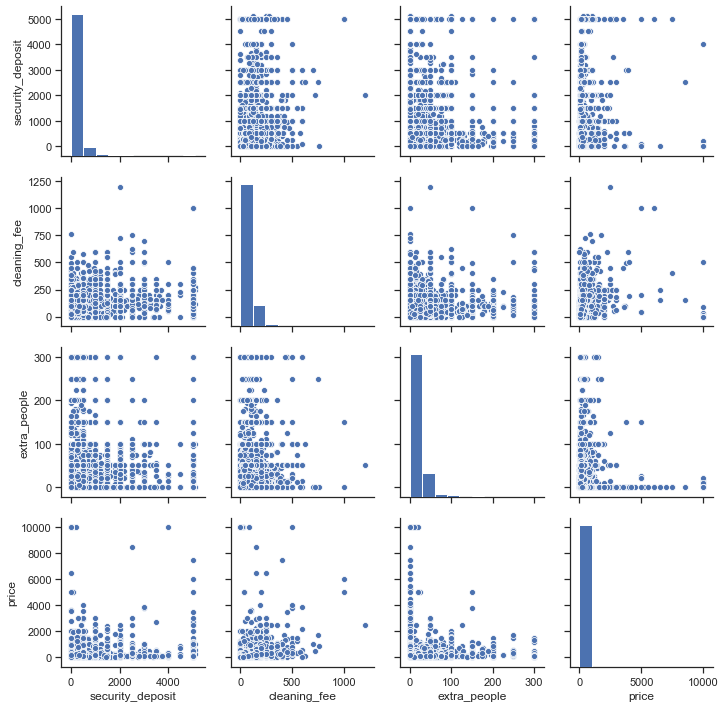

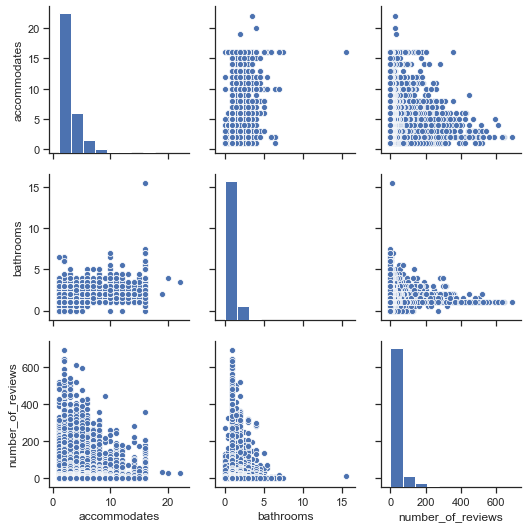

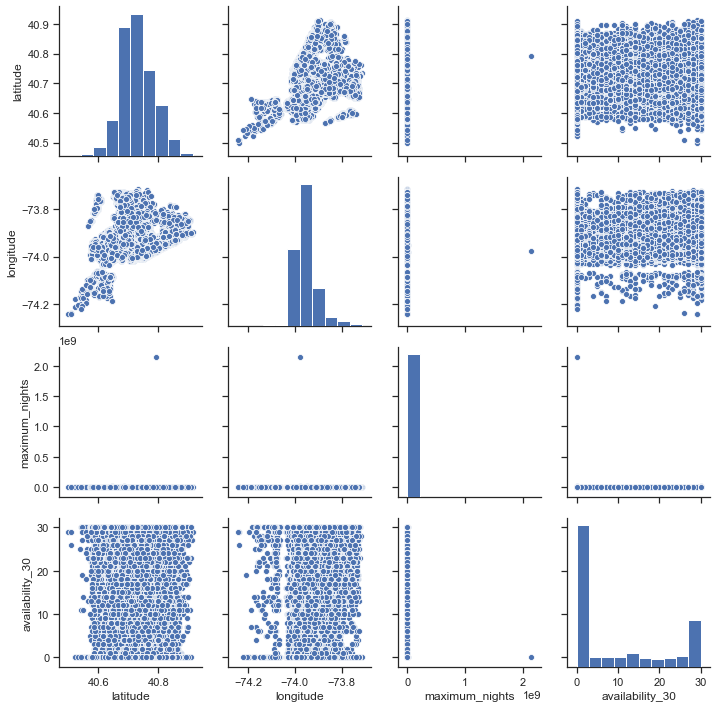

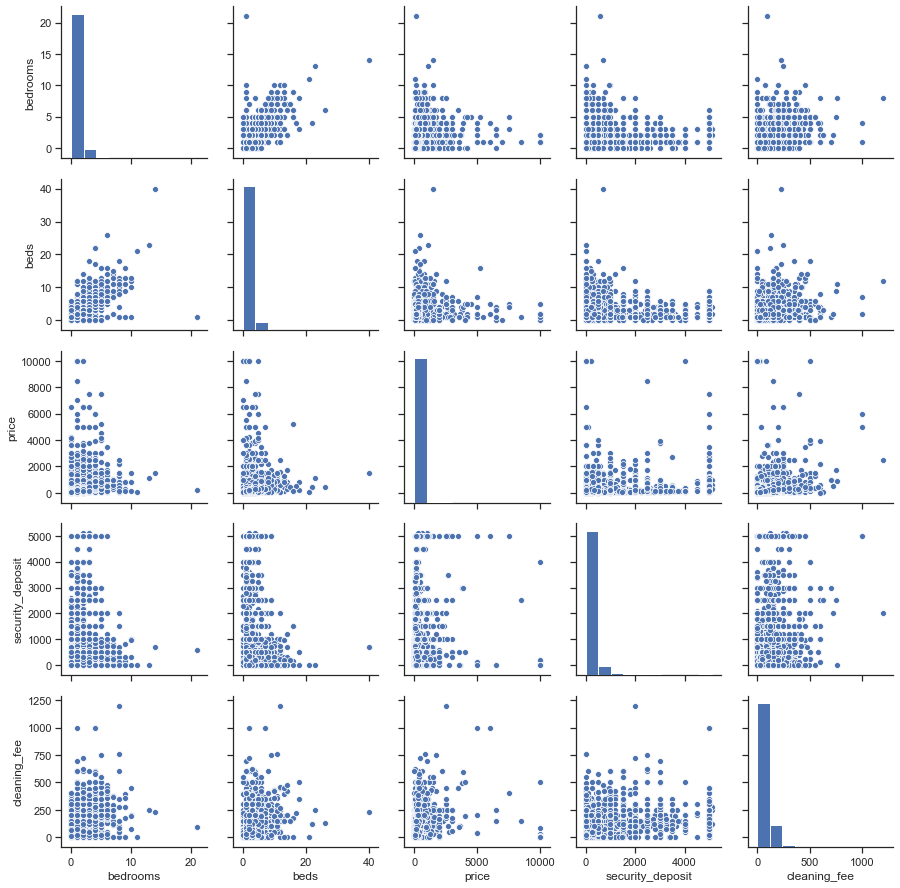

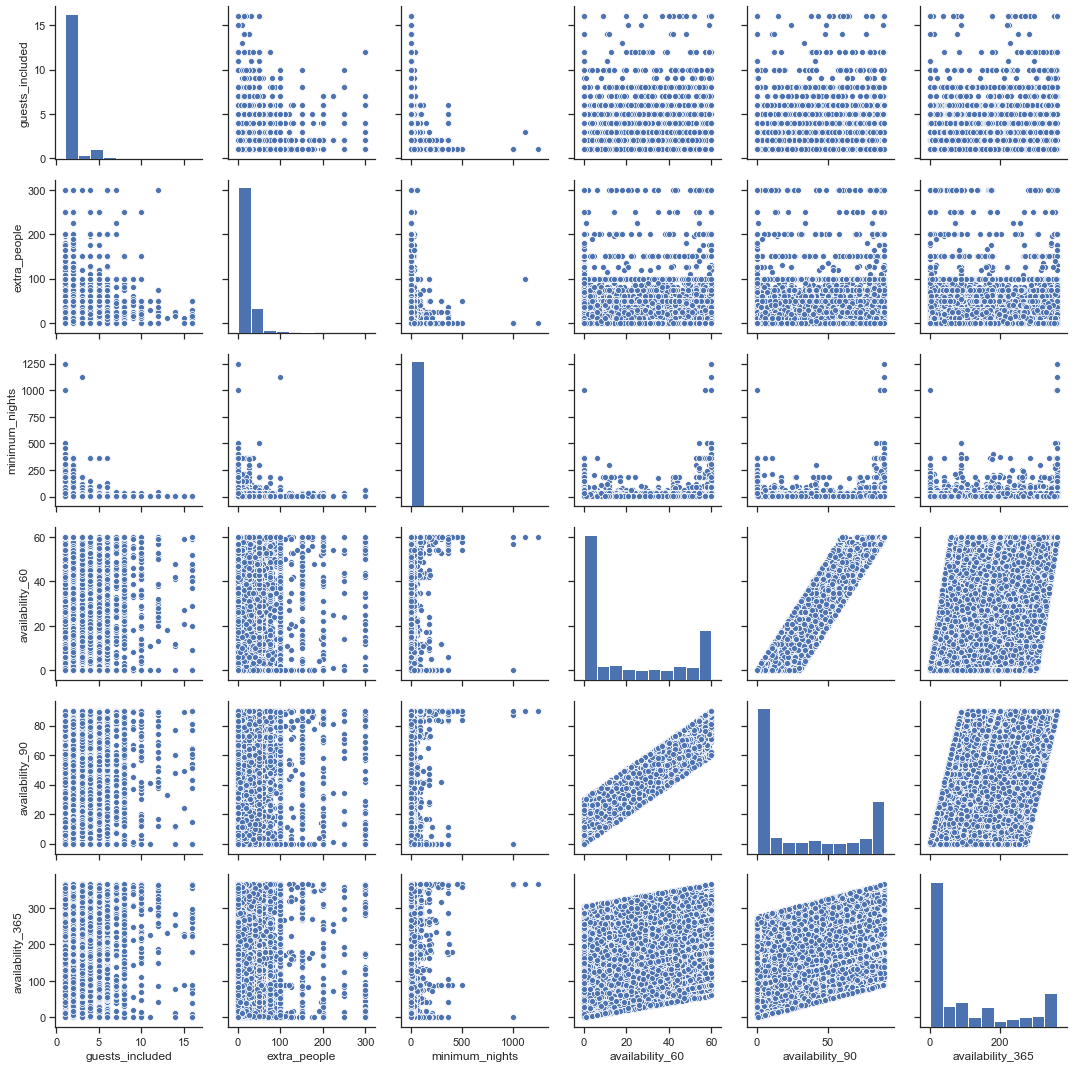

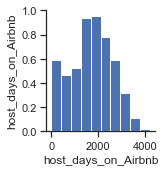

In [21]:
sns.pairplot(cleandata[dollarfeatures]);
for i in range(0,len(cleandata.columns),6):
    n = i + 6
    sns.pairplot(cleandata.iloc[:,i:n])

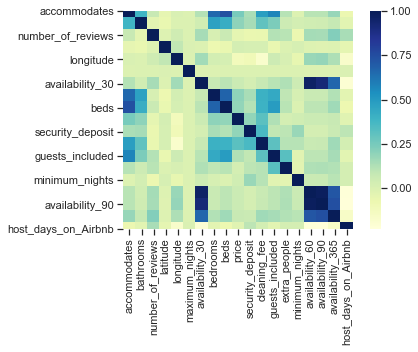

In [22]:
# explore correlations
# strong positive correlation between availability_60 and availability_90
cleandata_correlation = cleandata.corr()
sns.heatmap(cleandata_correlation,  square=True,cmap="YlGnBu")

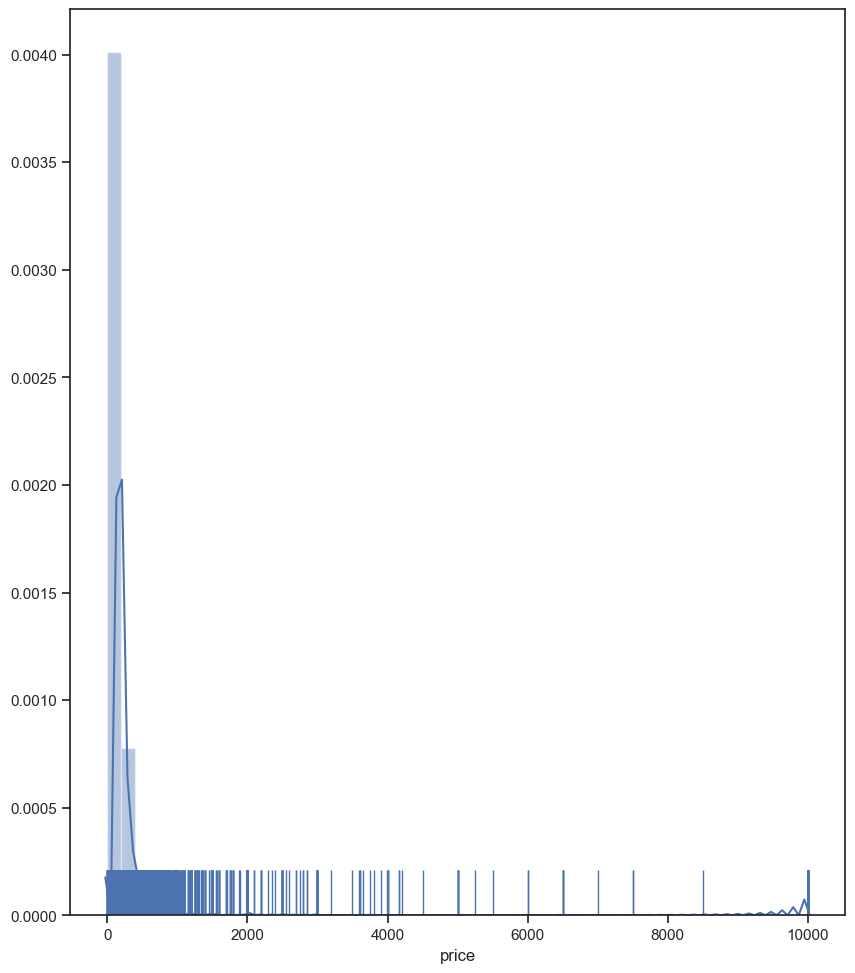

In [25]:
# explore the distribution of prices
# right skewed
sns.distplot(cleandata.price,rug=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


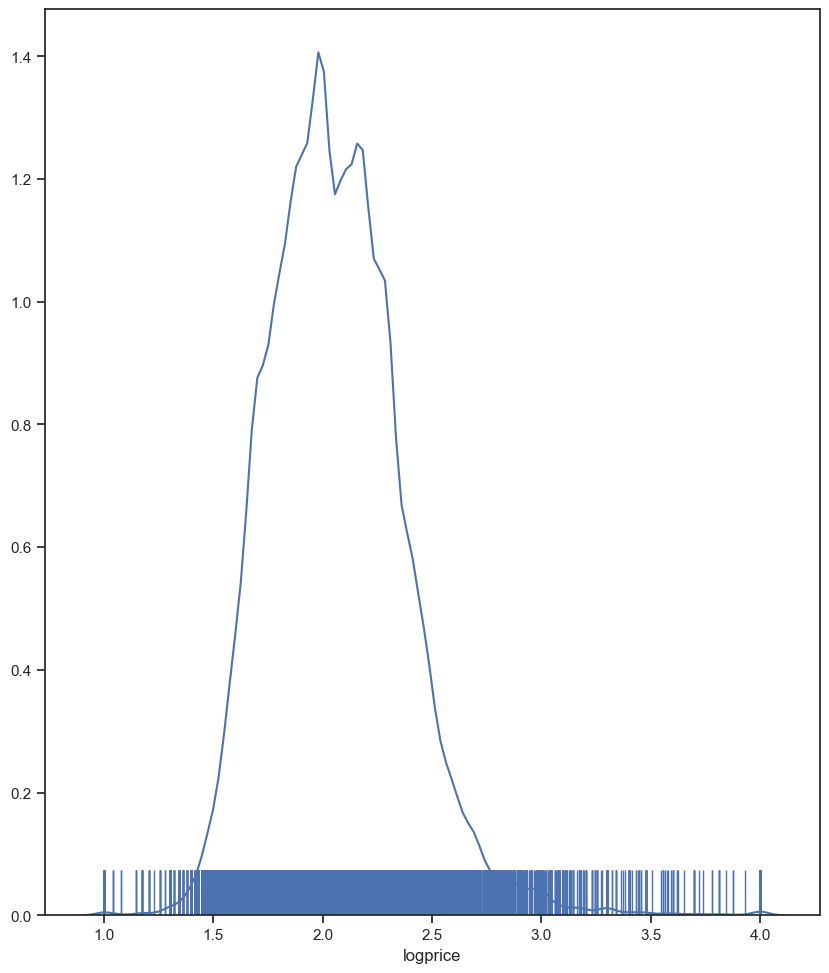

In [26]:
# explore log price
# one notable outlier
mask = cleandata.price > 0
cleandata['logprice'] = np.log10(cleandata[mask].price).round(4)
sns.distplot(cleandata.logprice, hist=False, rug=True)


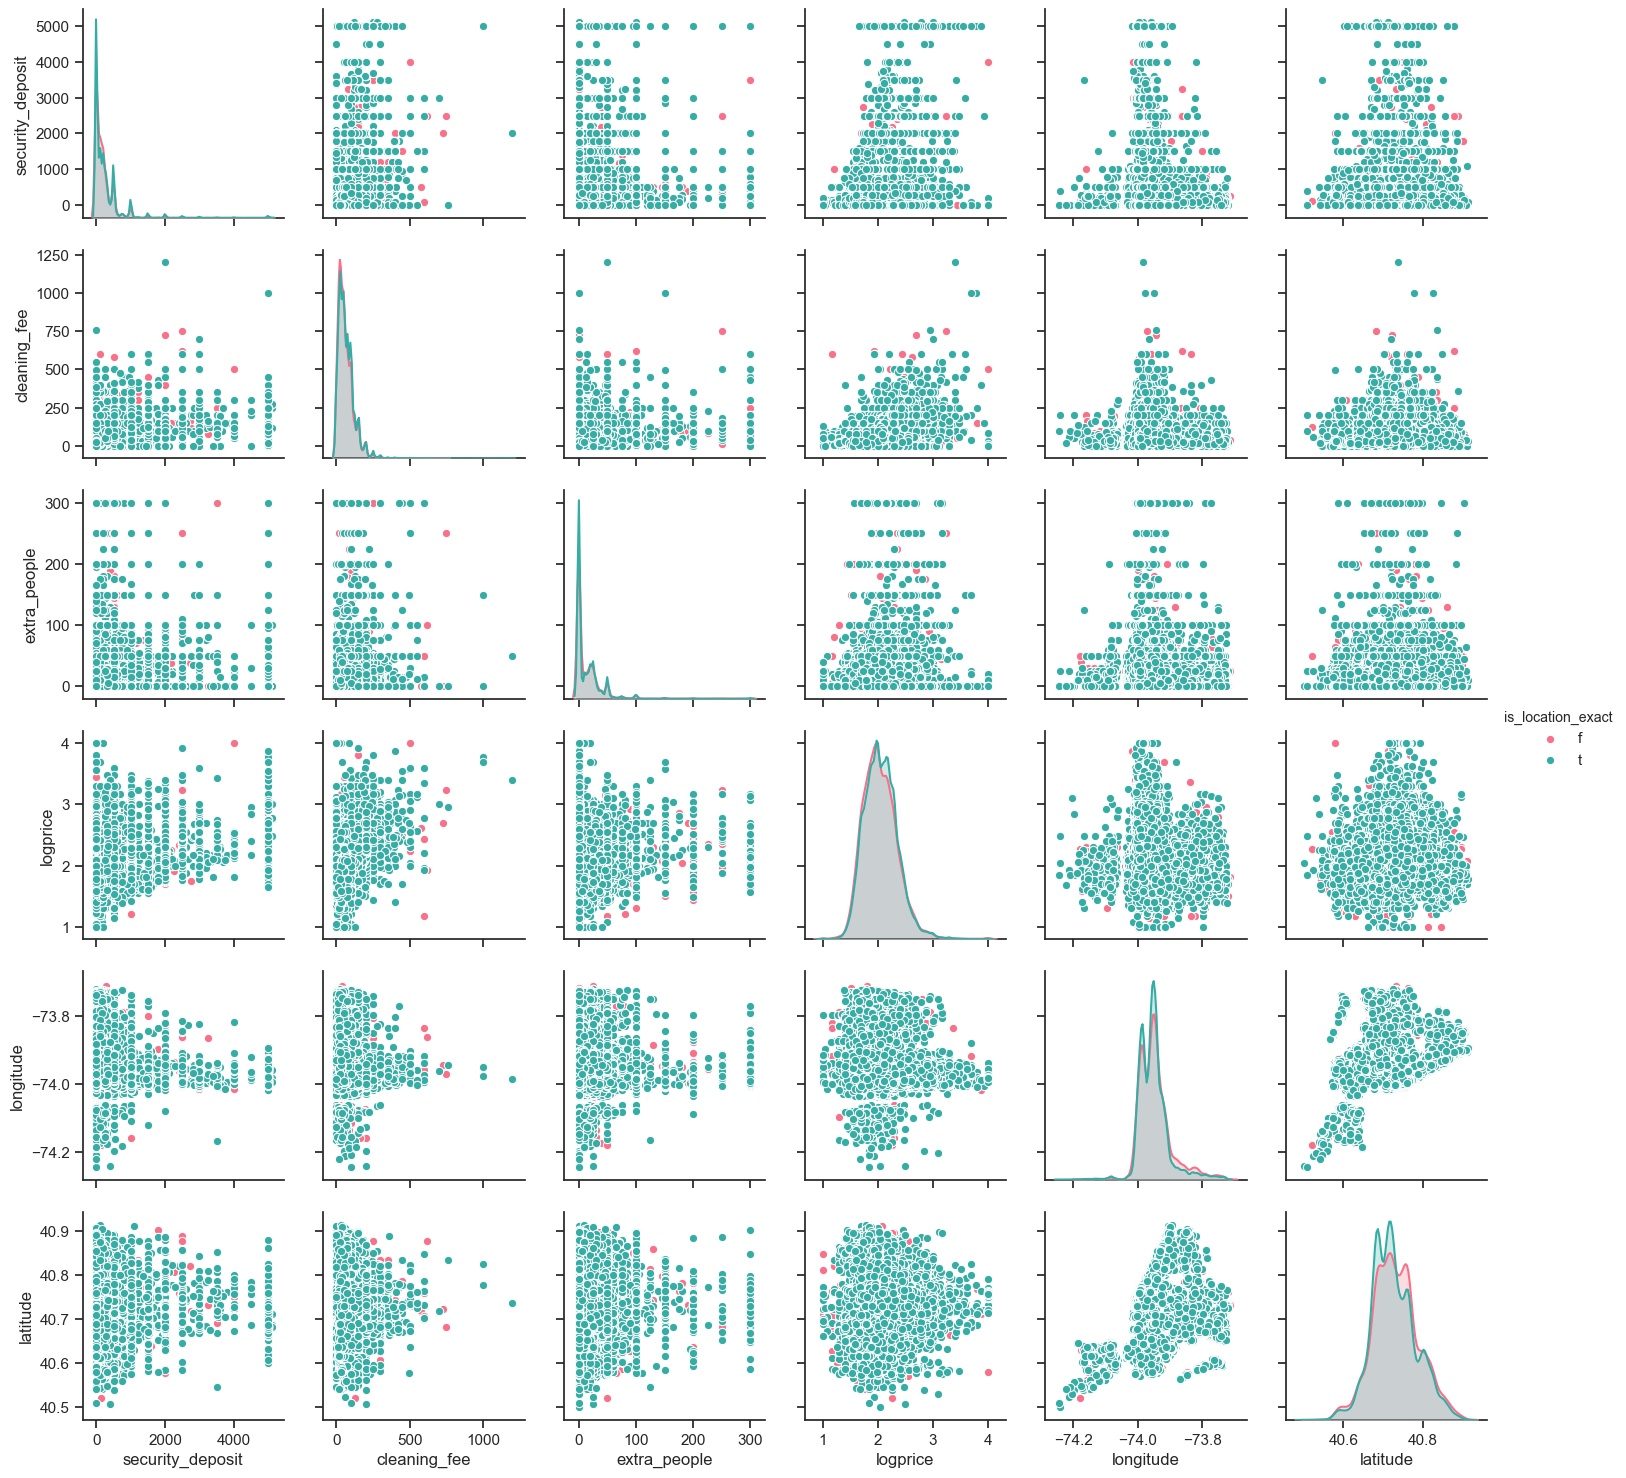

In [27]:
num_features = ['security_deposit','cleaning_fee', 'extra_people', 'logprice', 'longitude', 'latitude','is_location_exact']
sns.pairplot(cleandata[num_features], hue="is_location_exact",  palette="husl");

# D. Analysis and Modelling
    1. Answers to research/analysis question(s)  
    
###        A. Formulate research/analysis question(s)

        Question I:
           - Where are the Airbnb rooms in New York City?
              -  Analyzing the distribution of Airbnb listing in the 5 boroughs of NYC.

In [28]:
# # Get listing percentage for each New York Borough
# Analyzing the distribution of Airbnb listing in the 5 boroughs of NYC.
ddf = cleandata["Borough"].value_counts(normalize=True) * 100
ddf2 = cleandata["Borough"].value_counts() 
print("\n\n\n\nlisting each Borough Percentages :", ddf, "\n\n\n\nlisting each Borough Raw counts" , ddf2, sep="\n" )





listing each Borough Percentages :
Manhattan        42.559563
Brooklyn         42.049337
Queens           12.041351
Bronx             2.555570
Staten Island     0.794179
Name: Borough, dtype: float64




listing each Borough Raw counts
Manhattan        19185
Brooklyn         18955
Queens            5428
Bronx             1152
Staten Island      358
Name: Borough, dtype: int64


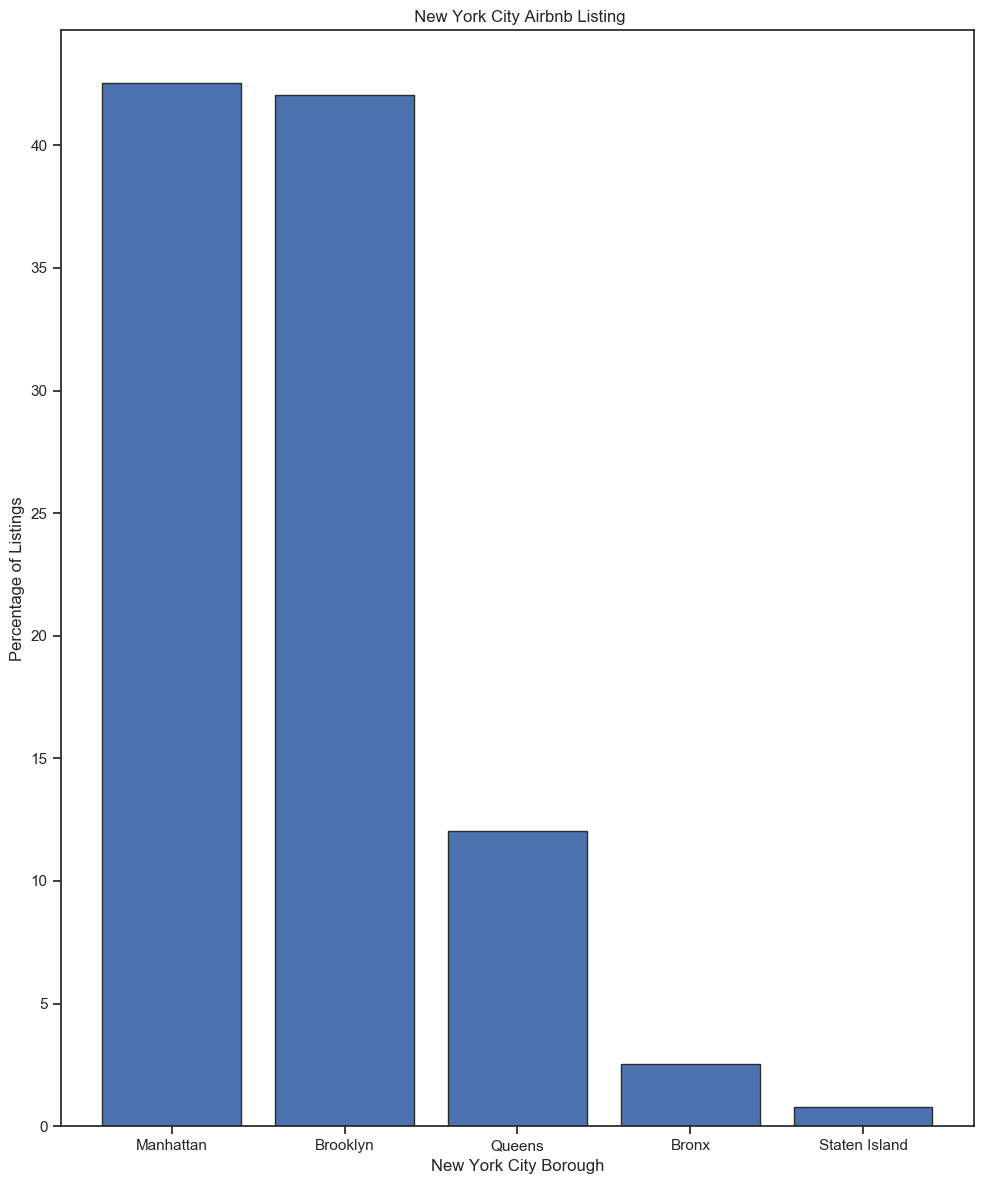

In [29]:
# Plot the Airbnb listing in New York
plt.bar( ddf.index, ddf.values,  edgecolor="#2b2b28")
plt.xlabel("New York City Borough")
plt.ylabel("Percentage of Listings")
plt.title("  New York City Airbnb Listing ")
plt.tight_layout()
plt.show()

In [30]:
# # get the room types percentages
roomtypes = cleandata["room_type"].value_counts(normalize=True) * 100
roomtypes2 = cleandata["room_type"].value_counts()
print("\n\n\n\nRoomtypes Percentages :", roomtypes, "\n\n\n\nRaw counts" , roomtypes2 , sep="\n")





Roomtypes Percentages :
Entire home/apt    53.653667
Private room       43.901682
Shared room         2.036470
Hotel room          0.408181
Name: room_type, dtype: float64




Raw counts
Entire home/apt    24186
Private room       19790
Shared room          918
Hotel room           184
Name: room_type, dtype: int64


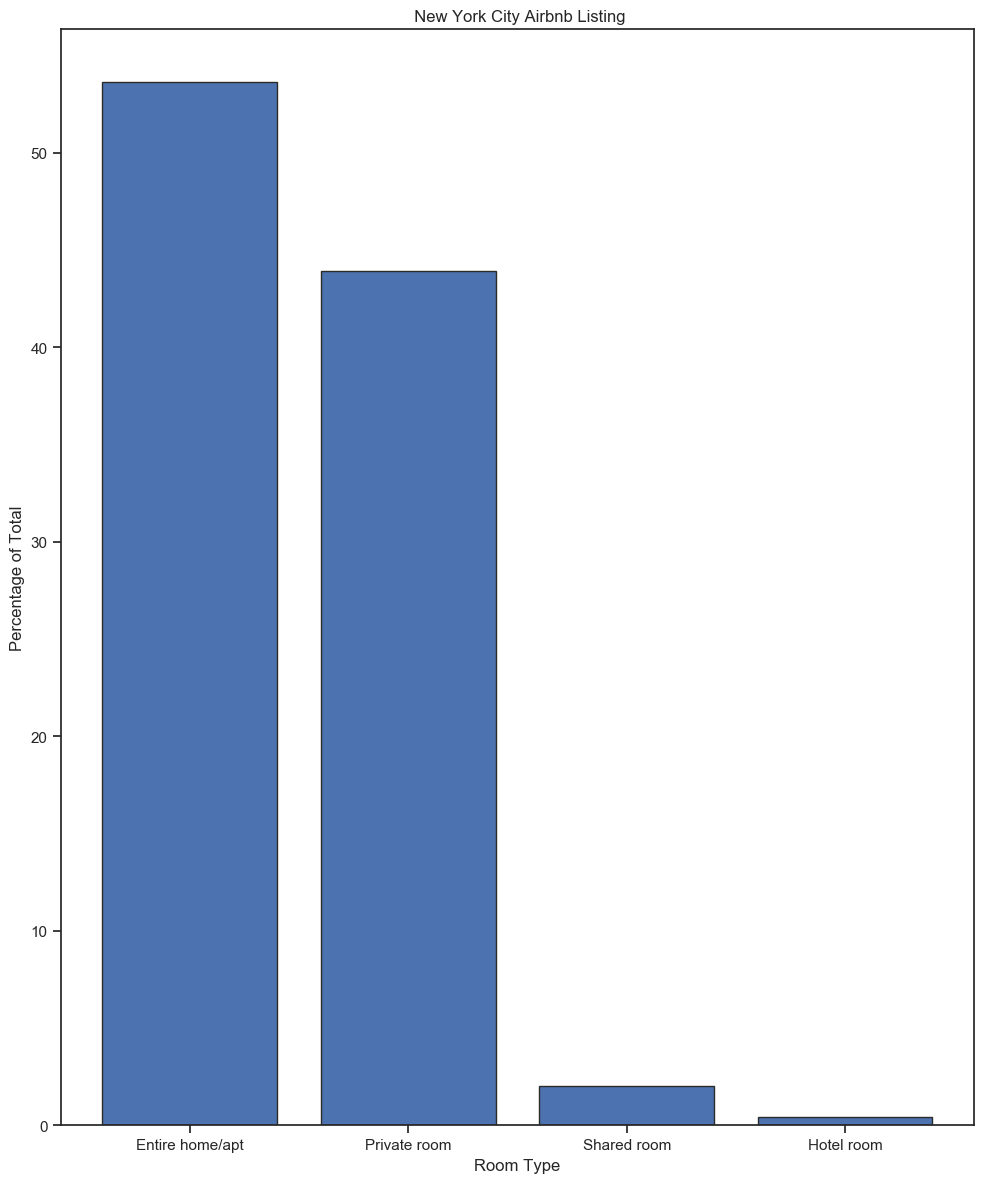

In [31]:
# # # plot the room types
plt.bar(roomtypes.index, roomtypes.values, edgecolor="#2b2b28")
plt.xlabel("Room Type")
plt.ylabel("Percentage of Total")
plt.title("  New York City Airbnb Listing ")
plt.tight_layout()
plt.show()

In [32]:
# # get the counts of room_types per bourough
hh = pd.crosstab(cleandata["Borough"], cleandata["room_type"], normalize="index", margins = True).fillna(0) * 100
hh2 = pd.crosstab(cleandata["Borough"], cleandata["room_type"],  margins = True).fillna(0)
hht = pd.crosstab(cleandata["Borough"], cleandata["room_type"], normalize="all").fillna(0) * 100
print("\n\n\n\nroom_types per bourough Percentages :", hh, " \n\n\n\nroom_types per bourough Raw counts" , hh2,
        " \n\n\n\nroom_types per bourough Raw counts", hht , sep="\n")





room_types per bourough Percentages :
room_type      Entire home/apt  Hotel room  Private room  Shared room
Borough                                                              
Bronx                37.847222    0.000000     58.246528     3.906250
Brooklyn             51.015563    0.068583     47.280401     1.635452
Manhattan            60.734949    0.828772     36.340891     2.095387
Queens               41.341194    0.221076     55.563744     2.873987
Staten Island        51.396648    0.000000     47.206704     1.396648
All                  53.653667    0.408181     43.901682     2.036470
 



room_types per bourough Raw counts
room_type      Entire home/apt  Hotel room  Private room  Shared room    All
Borough                                                                     
Bronx                      436           0           671           45   1152
Brooklyn                  9670          13          8962          310  18955
Manhattan                11652         159        

### A. Formulate research/analysis question(s)

       Question II:

        - Where is the most affordable best Airbnb rooms in New York using average price in each borough.
            - Analyzing the distribution of Airbnb average prices in the 5 boroughs of NYC.

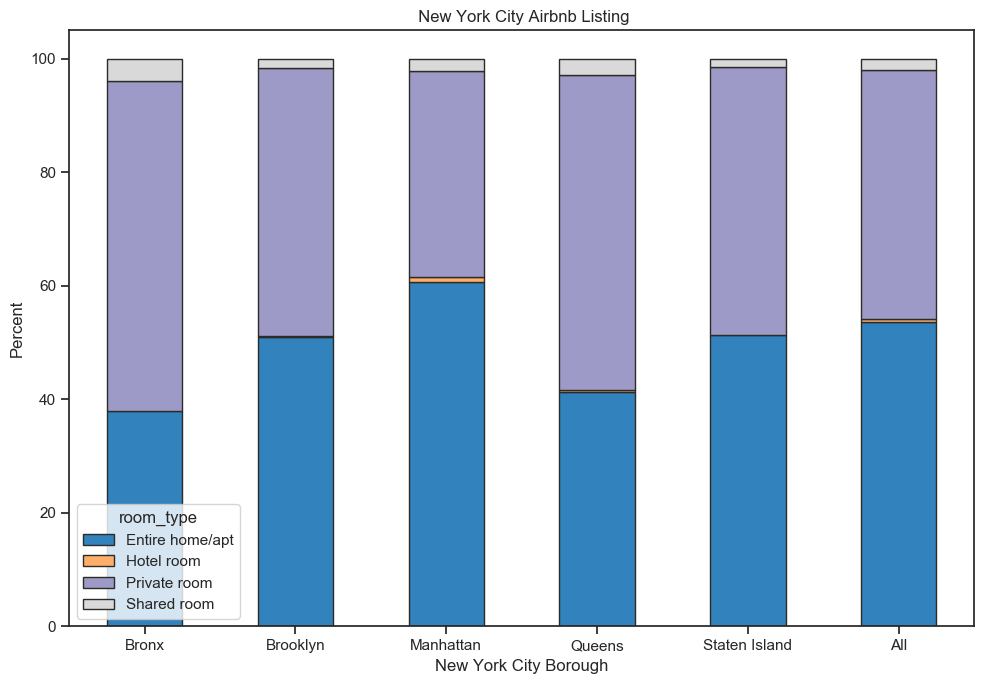

In [33]:
# # Plot the distribution of listings room_types within the boroughs
hh.plot.bar(stacked=True, cmap='tab20c', figsize=(10,7), edgecolor="#2b2b28")
plt.xticks(rotation=0)
plt.xlabel("New York City Borough")
plt.ylabel("Percent")
plt.title("  New York City Airbnb Listing ")
plt.tight_layout()
plt.show()

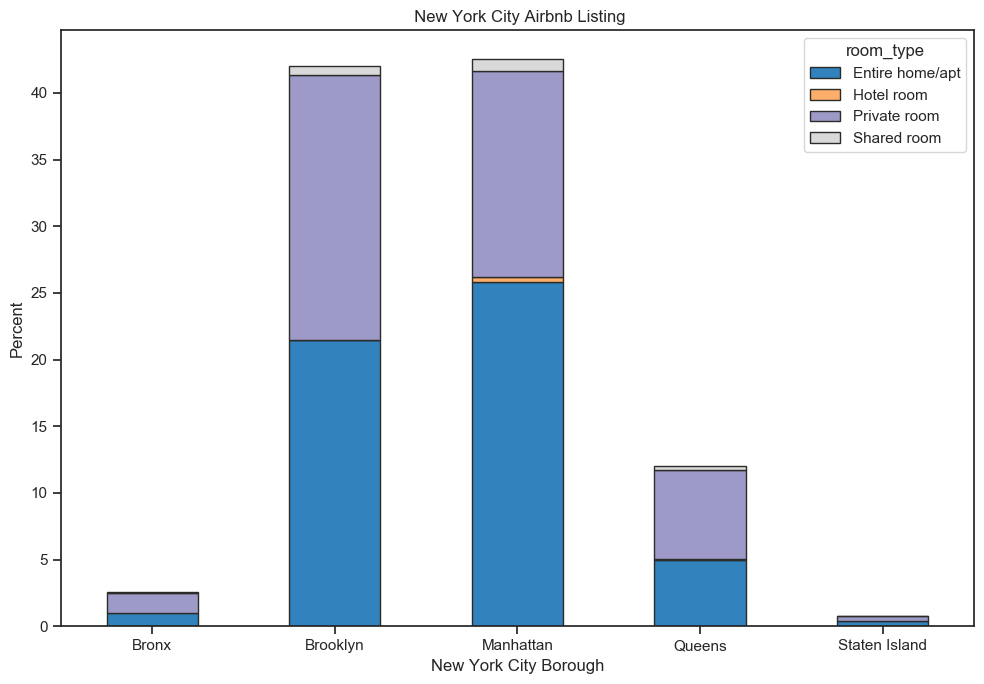

In [34]:
# # Plot the distribution of listings room_types across the boroughs
hht.plot.bar(stacked=True, cmap='tab20c', figsize=(10,7), edgecolor="#2b2b28")
plt.xticks(rotation=0)
plt.xlabel("New York City Borough")
plt.ylabel("Percent")
plt.title("  New York City Airbnb Listing ")
plt.tight_layout()
plt.show()

### A. Formulate research/analysis question(s)

       Question III:

        - What is the most popular and affordable Airbnb rooms in each New York borough
            - Finding the average prices of Airbnb rooms according to room types in each NYC borough.
            


In [35]:
# # find average price of listing in each borough
ave_price = cleandata.groupby("Borough", as_index=False).agg({'price': 'mean'})
print("average price of listing in each borough :", ave_price, sep="\n")

average price of listing in each borough :
         Borough       price
0          Bronx   92.307292
1       Brooklyn  128.416249
2      Manhattan  208.563722
3         Queens  102.608696
4  Staten Island  109.069832


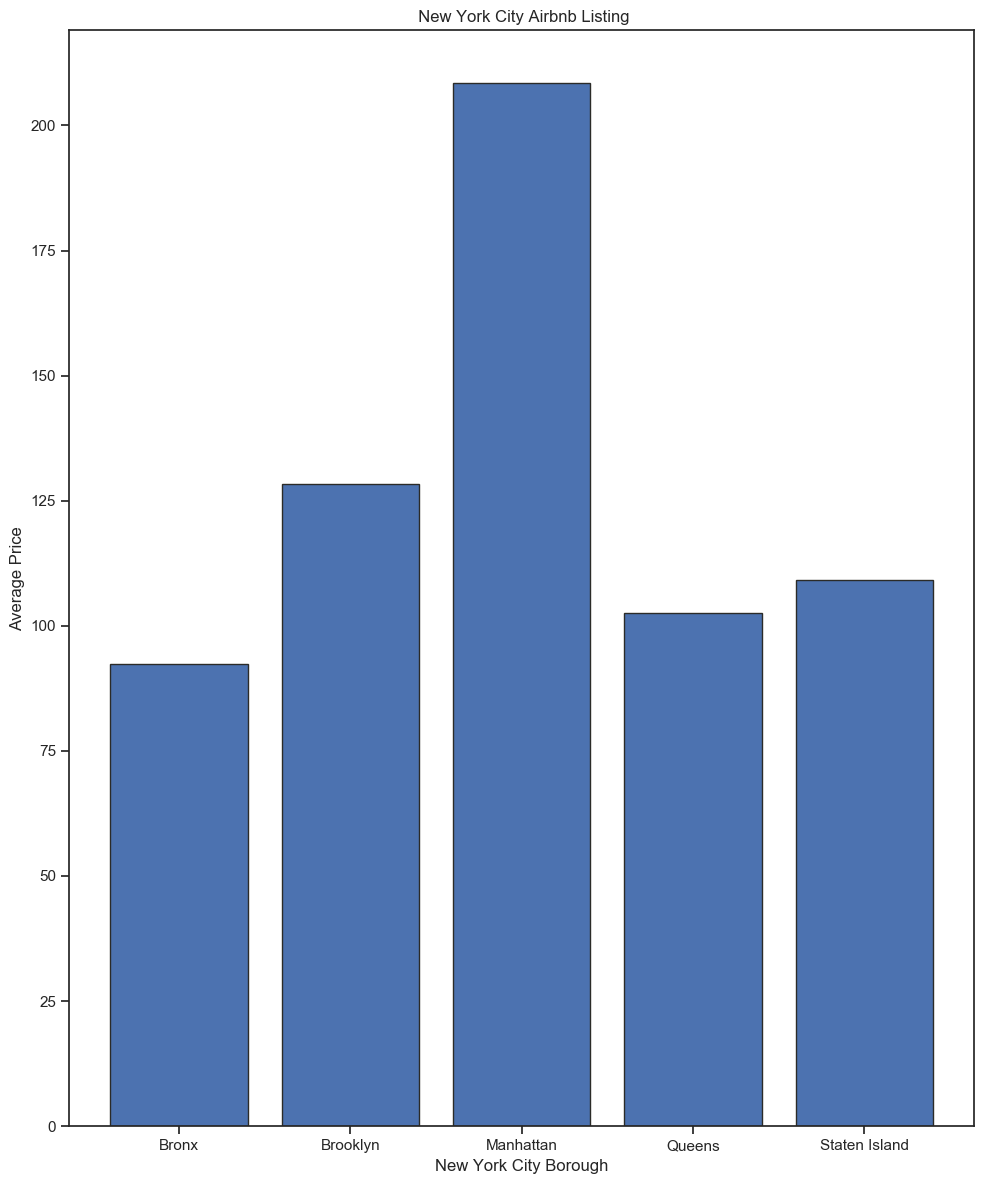

In [36]:
# # # plot the Average price of listing in each Borough
plt.bar(ave_price.Borough, ave_price.price, edgecolor="#2b2b28")
plt.xlabel("New York City Borough")
plt.ylabel("Average Price")
plt.title("  New York City Airbnb Listing ")
plt.tight_layout()
plt.show()


In [37]:
# # Average price per room type in each Borough
nprice_room = cleandata.groupby(["Borough", "room_type"], as_index=False, observed=True).agg({'price': 'mean'})
price_room = nprice_room.pivot(index = 'Borough', columns = "room_type", values = "price")
print("\n\n\nAverage price per room type in each Borough :", nprice_room, 
       "\n\n\nAverage price per room type in each Borough: Pivot" , price_room , sep="\n")




Average price per room type in each Borough :
          Borough        room_type       price
0       Manhattan  Entire home/apt  251.344576
1       Manhattan     Private room  140.018503
2       Manhattan      Shared room  115.079602
3       Manhattan       Hotel room  315.452830
4        Brooklyn  Entire home/apt  177.941675
5        Brooklyn     Private room   76.305735
6        Brooklyn      Shared room   87.238710
7        Brooklyn       Hotel room  195.230769
8          Queens  Entire home/apt  145.081551
9          Queens     Private room   71.163462
10         Queens      Shared room   96.724359
11         Queens       Hotel room  139.916667
12  Staten Island  Entire home/apt  150.842391
13  Staten Island     Private room   65.923077
14  Staten Island      Shared room   30.200000
15          Bronx  Entire home/apt  131.529817
16          Bronx     Private room   66.782414
17          Bronx      Shared room   92.888889



Average price per room type in each Borough: Pivot
room

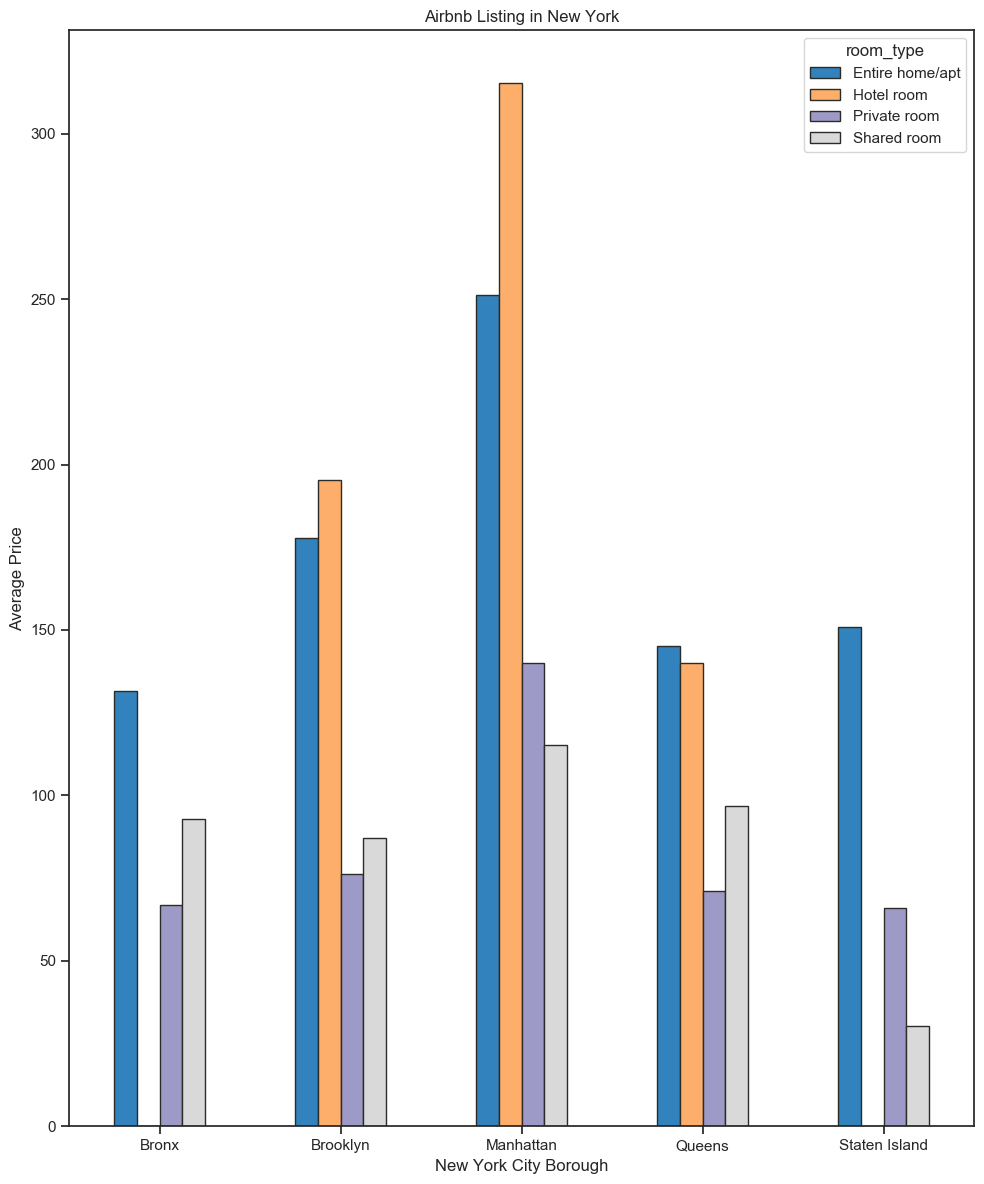

In [38]:
# plot the average price within each borough
price_room.plot.bar(rot=0, cmap='tab20c', edgecolor="#2b2b28")
plt.xlabel("New York City Borough")
plt.ylabel("Average Price")
plt.title("Airbnb Listing in New York")
plt.tight_layout()
plt.show()

### A. Formulate research/analysis question(s)

       Question IV:

        - What are the major determinants of prices of rooms in New York Airbnb 
            - Finding factors that positively and negatively impact the price of Airbnb rooms in NYC using linear regression analysis.
            


In [39]:
# prepare dataset for analysis
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45078 entries, 0 to 51096
Data columns (total 30 columns):
host_is_superhost                   45072 non-null category
host_has_profile_pic                45072 non-null category
host_identity_verified              45072 non-null category
accommodates                        45078 non-null int64
bathrooms                           45032 non-null float64
number_of_reviews                   45078 non-null int64
latitude                            45078 non-null float64
longitude                           45078 non-null float64
is_location_exact                   45078 non-null category
room_type                           45078 non-null category
maximum_nights                      45078 non-null int64
availability_30                     45078 non-null int64
bedrooms                            45003 non-null float64
beds                                44775 non-null float64
bed_type                            45078 non-null category
price   

In [55]:
def preanalysis(datat):
    """The 'preanalysis' function replaces or drop missing, NAN or Na and
        get dummies from categorical features.
 
    Args: 
        'data1' (DataFrame): the DataFrame for data wrangling

 
    Returns: 
        DataFrame: The DataFrame for analysis
 
    """
    # replace nans with zero
    data = datat.copy()
    data[['security_deposit','cleaning_fee']] = data[['security_deposit','cleaning_fee']].fillna(value=0)
    data = data.dropna()


    # Hot encoding for binary catergory
    binary_cat = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
                    'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']
    
    dff = pd.get_dummies(data, prefix_sep="_")

    return dff

In [56]:
# prepare data for analysis
analysis_data = preanalysis(cleandata) 
print(analysis_data.info(), analysis_data.shape, sep="\n\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44685 entries, 0 to 51096
Data columns (total 48 columns):
accommodates                          44685 non-null int64
bathrooms                             44685 non-null float64
number_of_reviews                     44685 non-null int64
latitude                              44685 non-null float64
longitude                             44685 non-null float64
maximum_nights                        44685 non-null int64
availability_30                       44685 non-null int64
bedrooms                              44685 non-null float64
beds                                  44685 non-null float64
price                                 44685 non-null float64
security_deposit                      44685 non-null float64
cleaning_fee                          44685 non-null float64
guests_included                       44685 non-null int64
extra_people                          44685 non-null float64
minimum_nights                        44685 non

In [57]:
# split data for analysis and validation
analysis_data.dropna()
target = analysis_data.pop("logprice")
analysis_data.drop(columns=["price"], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(analysis_data, target, test_size=0.2)

In [58]:
# explore the split data
print(X_train.head(), X_test.head(), y_train.head(), y_test.head(), sep="\n", end="\n\n")
print(X_train.shape,  y_train.shape, X_test.shape, y_test.shape, sep="\n")

       accommodates  bathrooms  number_of_reviews  latitude  longitude  \
5677              6        2.0                 51  40.77648  -73.91595   
6833              1        1.0                 13  40.72795  -73.98539   
22130             2        1.0                 23  40.80416  -73.95704   
22832             2        1.0                  3  40.77692  -73.95127   
29126             2        1.0                  2  40.68616  -73.91866   

       maximum_nights  availability_30  bedrooms  beds  security_deposit  ...  \
5677             1125               15       2.0   2.0             250.0  ...   
6833                7               28       1.0   1.0               0.0  ...   
22130            1125                0       1.0   1.0             150.0  ...   
22832             180               30       1.0   1.0             500.0  ...   
29126              14                0       1.0   1.0               0.0  ...   

       instant_bookable_t  require_guest_profile_picture_f  \
5677  

In [124]:
# construct the data analysis pipeline
pl = Pipeline([
              ("scaler", StandardScaler()),
              ("radomForest", RandomForestRegressor(n_estimators = 500, n_jobs = -1,
                           oob_score = True, bootstrap = True, random_state = 2202))
            ])

In [125]:
# fit and evaluate the model
pl.fit(X_train, y_train)
pred = pl.predict(X_test)

print("mean_absolute_error : ", mean_absolute_error(y_test, pred))
print("mean_squared_error: ", mean_squared_error(y_test, pred))
print("Root mean_squared_error: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R_squared : ", pl.score(X_test, y_test))
print("R2_squared : ", r2_score(pred, y_test))

mean_absolute_error :  0.11948673275596963
mean_squared_error:  0.029457399203928477
Root mean_squared_error:  0.17163157985618055
R_squared :  0.6750174144436007
R2_squared :  0.5236712892954964


In [48]:
# fit and evaluate complex models

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV


estimatorstack = [
    ('Random Forest', RandomForestRegressor(random_state=342)),
    ('Lasso', LassoCV())
        ]


stacking_regressor = StackingRegressor(
    estimators=estimatorstack, final_estimator=RidgeCV())


estimators = [('OLS', LinearRegression()),
              ('Theil-Sen', TheilSenRegressor(random_state=682)),
              ('RANSAC', RANSACRegressor(random_state=9052)),
              ('HuberRegressor', HuberRegressor()),
              ("decisionTree", DecisionTreeRegressor()),
              ("radomForest", RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 3452)), 
            ('Stacked Regressors', stacking_regressor),
            ("MLregs", MLPRegressor(hidden_layer_sizes=(100,100),
                                    tol=1e-2, max_iter=5000, random_state=670))
            ]

for name, estimator in estimators:
    model = make_pipeline(StandardScaler(), estimator)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name," mean_absolute_error : ", mean_absolute_error(y_test, pred))
    print(name," mean_squared_error: ", mean_squared_error(y_test, pred))
    print(name," Root mean_squared_error: ", np.sqrt(mean_squared_error(y_test, pred)))
    print(name," R2_squared : ", r2_score(pred, y_test))
    print(name," R_squared : ", model.score(X_test, y_test), end="\n\n")
    

OLS  mean_absolute_error :  0.13988029516539568
OLS  mean_squared_error:  0.03905320294442518
OLS  Root mean_squared_error:  0.1976188324639764
OLS  R2_squared :  0.28264443166503916
OLS  R_squared :  0.5779350193670276

Theil-Sen  mean_absolute_error :  0.31642120613682606
Theil-Sen  mean_squared_error:  4.610522612751241
Theil-Sen  Root mean_squared_error:  2.147212754421704
Theil-Sen  R2_squared :  0.007562444329575646
Theil-Sen  R_squared :  -48.82792679074012

RANSAC  mean_absolute_error :  0.36688845730633046
RANSAC  mean_squared_error:  162.8150648265272
RANSAC  Root mean_squared_error:  12.759900658959975
RANSAC  R2_squared :  -7.565071070692042e-06
RANSAC  R_squared :  -1758.6133479897806

HuberRegressor  mean_absolute_error :  0.13893407537365612
HuberRegressor  mean_squared_error:  0.03946914126437717
HuberRegressor  Root mean_squared_error:  0.19866842040036753
HuberRegressor  R2_squared :  0.2860200025705454
HuberRegressor  R_squared :  0.5734397927090535

decisionTree  me

    
# Output

    OLS  mean_absolute_error :  0.13988029516539568
    OLS  mean_squared_error:  0.03905320294442518
    OLS  Root mean_squared_error:  0.1976188324639764
    OLS  R2_squared :  0.28264443166503916
    OLS  R_squared :  0.5779350193670276

    Theil-Sen  mean_absolute_error :  0.31642120613682606
    Theil-Sen  mean_squared_error:  4.610522612751241
    Theil-Sen  Root mean_squared_error:  2.147212754421704
    Theil-Sen  R2_squared :  0.007562444329575646
    Theil-Sen  R_squared :  -48.82792679074012

    RANSAC  mean_absolute_error :  0.36688845730633046
    RANSAC  mean_squared_error:  162.8150648265272
    RANSAC  Root mean_squared_error:  12.759900658959975
    RANSAC  R2_squared :  -7.565071070692042e-06
    RANSAC  R_squared :  -1758.6133479897806

    HuberRegressor  mean_absolute_error :  0.13893407537365612
    HuberRegressor  mean_squared_error:  0.03946914126437717
    HuberRegressor  Root mean_squared_error:  0.19866842040036753
    HuberRegressor  R2_squared :  0.2860200025705454
    HuberRegressor  R_squared :  0.5734397927090535

    decisionTree  mean_absolute_error :  0.17522363582111822
    decisionTree  mean_squared_error:  0.060854076940186234
    decisionTree  Root mean_squared_error:  0.24668619122315347
    decisionTree  R2_squared :  0.35691306341919005
    decisionTree  R_squared :  0.34232347493373655

    radomForest  mean_absolute_error :  0.12083424502413624
    radomForest  mean_squared_error:  0.03006908430964762
    radomForest  Root mean_squared_error:  0.17340439530083318
    radomForest  R2_squared :  0.5311448560329223
    radomForest  R_squared :  0.6750303040479735

    Stacked Regressors  mean_absolute_error :  0.12090605028442415
    Stacked Regressors  mean_squared_error:  0.030230604673628945
    Stacked Regressors  Root mean_squared_error:  0.17386950472589766
    Stacked Regressors  R2_squared :  0.52810017116366
    Stacked Regressors  R_squared :  0.6732846830961499

    MLregs  mean_absolute_error :  0.1337693352256908
    MLregs  mean_squared_error:  0.035579289925210866
    MLregs  Root mean_squared_error:  0.1886247330686272
    MLregs  R2_squared :  0.49413721052259063
    MLregs  R_squared :  0.6154791110324878


In [103]:
# RandomForestRegressor outperformed even the complex models
# let get the feature importance
def dfform(lstt):
    """The dfform function form pandas dataframe.
 
    Args: 
        lstt (list, series): the list or series to used in forming dataFrame

 
    Returns: 
        DataFrame: The DataFrame for analysis
 
    """
    df = pd.DataFrame(list(zip(X_test.columns, lstt)), columns=["features", "coefficients"])
    df3 = df.sort_values(by="coefficients", ascending=True)

    return df3

features_weight = dfform(pl[-1].feature_importances_)
features_weight.head()

,features,coefficients
45,Borough_Staten Island,0.000064
31,bed_type_Couch,0.000168
20,host_has_profile_pic_f,0.000189
21,host_has_profile_pic_t,0.000191
41,Borough_Bronx,0.000288


In [101]:
# visualize the important feature affecting prices

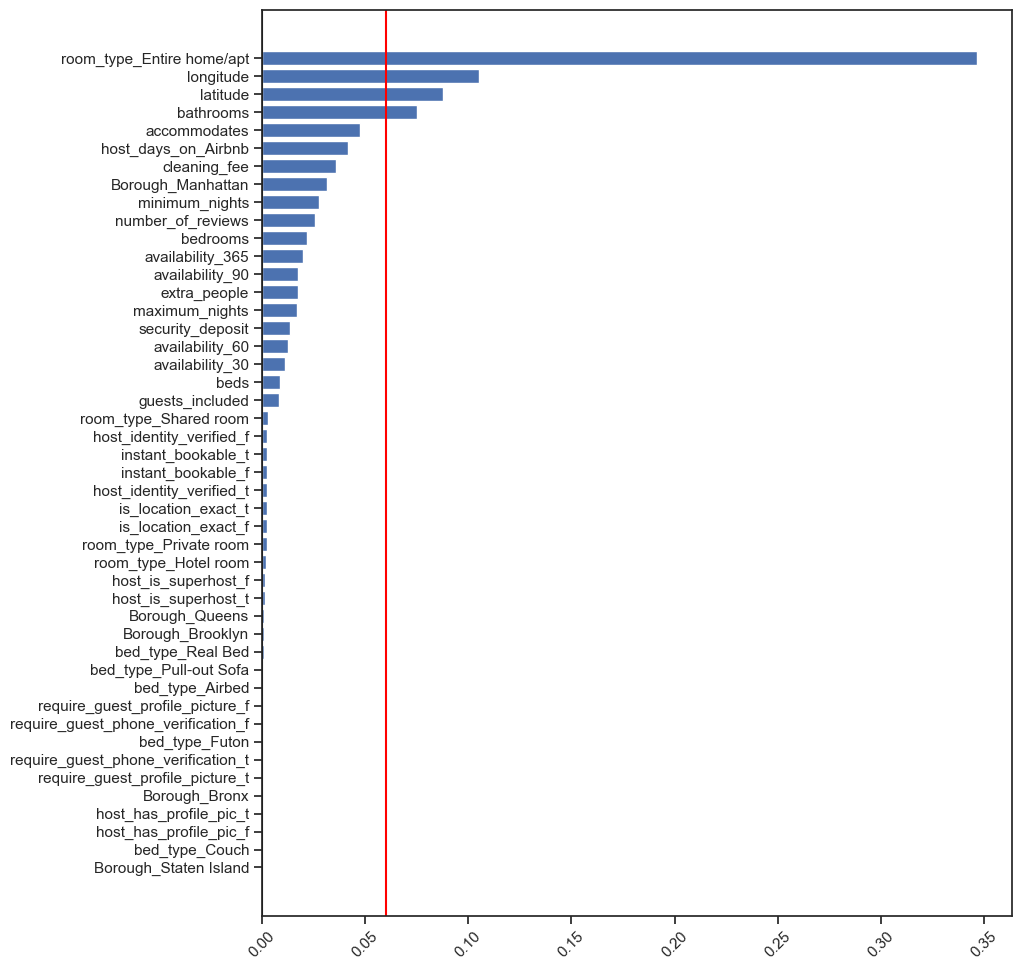

In [102]:
# data7.sort_values(by="coefficients", inplace=True)
plt.barh(features_weight.features, features_weight.coefficients)
plt.xticks(rotation=45)
plt.axvline(x=0.06, color='red', linestyle='-')
plt.axvline(x= 0.0, color='black', linestyle='-')
# plt.axvline(x=-10.0, color='red', linestyle='-')
plt.gcf().subplots_adjust(left=0.15)
plt.show()

In [104]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor


# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])

estimators2 = [
    ("GradientBoostingRegressor", reg1),
    ("RandomForestRegressor", reg2),
    ("LinearRegression", reg3),
    ("VotingRegressor", ereg)
]

for name, estimator in estimators2:
    model = make_pipeline(StandardScaler(), estimator)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name," mean_absolute_error : ", mean_absolute_error(y_test, pred))
    print(name," mean_squared_error: ", mean_squared_error(y_test, pred))
    print(name," Root mean_squared_error: ", np.sqrt(mean_squared_error(y_test, pred)))
    print(name," R2_squared : ", r2_score(pred, y_test))
    print(name," R_squared : ", model.score(X_test, y_test), end="\n\n")



GradientBoostingRegressor  mean_absolute_error :  0.16045950773885248
GradientBoostingRegressor  mean_squared_error:  0.0478054823441287
GradientBoostingRegressor  Root mean_squared_error:  0.21864464856046376
GradientBoostingRegressor  R2_squared :  -1.6401008285947603
GradientBoostingRegressor  R_squared :  0.4725960310204901

RandomForestRegressor  mean_absolute_error :  0.1274622904591399
RandomForestRegressor  mean_squared_error:  0.03234520068909492
RandomForestRegressor  Root mean_squared_error:  0.17984771527349164
RandomForestRegressor  R2_squared :  0.5079937236649001
RandomForestRegressor  R_squared :  0.643158349536817

LinearRegression  mean_absolute_error :  0.1387841134044628
LinearRegression  mean_squared_error:  0.03793442241895073
LinearRegression  Root mean_squared_error:  0.19476761131910697
LinearRegression  R2_squared :  0.28525109063224163
LinearRegression  R_squared :  0.5814964317129816

VotingRegressor  mean_absolute_error :  0.1308907879879145
VotingRegressor

In [105]:
pl[-1].oob_prediction_

array([2.22611354, 2.01393333, 2.03639581, ..., 1.95316615, 2.16319891,
       1.78140296])

In [116]:
# set up a linear Regression pipeline train and evaluate the model

pl2 = Pipeline([("scaler", StandardScaler()),
              ("LinearRegression", LinearRegression())])

pl2.fit(X_train, y_train)
pred = pl2.predict(X_test)

print("mean_absolute_error : ", mean_absolute_error(y_test, pred))
print("mean_squared_error: ", mean_squared_error(y_test, pred))
print("Root mean_squared_error: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R_squared : ", pl2.score(X_test, y_test))
print("R2_squared : ", r2_score(pred, y_test))

mean_absolute_error :  0.1387841134044628
mean_squared_error:  0.03793442241895073
Root mean_squared_error:  0.19476761131910697
R_squared :  0.5814964317129816
R2_squared :  0.28525109063224163


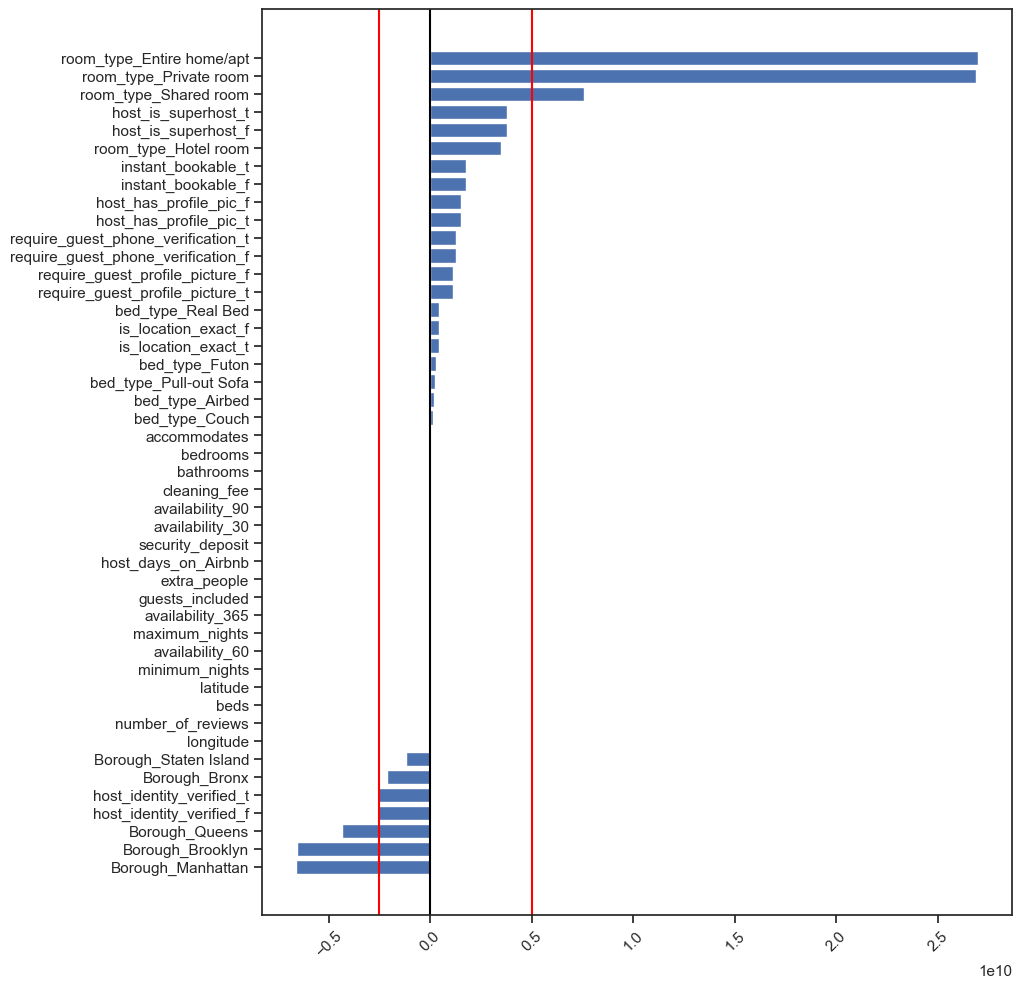

In [121]:
# get model coefficients
feature_coeff = dfform(pl2[-1].coef_)


# visualize the feature coefficients
plt.barh(feature_coeff.features, feature_coeff.coefficients)
plt.xticks(rotation=45)
plt.axvline(x=0.5e10, color='red', linestyle='-')
plt.axvline(x= 0.0, color='black', linestyle='-')
plt.axvline(x=-0.25e10, color='red', linestyle='-')
plt.gcf().subplots_adjust(left=0.15)
plt.show()





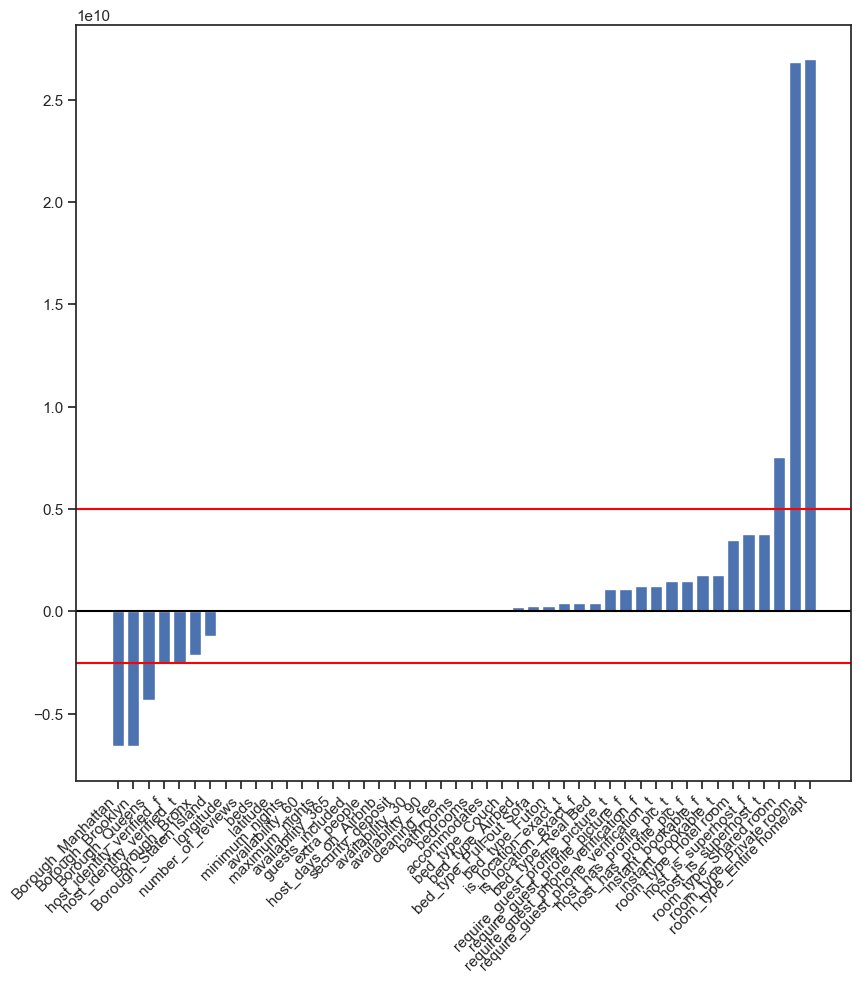

In [123]:

plt.bar(feature_coeff.features, feature_coeff.coefficients)
plt.xticks(np.arange(len(feature_coeff.features)), rotation = 45, ha="right")
plt.axhline(y=0.0, color='black', linestyle='-')
plt.axhline(y=0.5e10, color='red', linestyle='-')
plt.axhline(y=-0.25e10, color='red', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.25)
plt.show()

In [ ]:
from sklearn.base import clone 

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = dfform(importances)
    return importances_df


ddd = drop_col_feat_imp(pl, X_train, y_train)

ddd.sort_values(by="coefficients", inplace=True)
plt.barh(ddd.features, ddd.coefficients)
plt.xticks(rotation=45)
plt.axvline(x=0.003, color='red', linestyle='-')
plt.axvline(x= 0.0, color='black', linestyle='-')
plt.axvline(x= -0.001, color='red', linestyle='-')
plt.gcf().subplots_adjust(left=0.15)
plt.savefig(os.path.join(dir2, "CustomImportance1.png"))
plt.show()





In [ ]:
ddd.sort_values(by="coefficients", inplace=True)
plt.barh(ddd.features, ddd.coefficients)
plt.xticks(rotation=45)
plt.axvline(x=0.003, color='red', linestyle='-')
plt.axvline(x= 0.0, color='black', linestyle='-')
plt.axvline(x= -0.001, color='red', linestyle='-')
plt.gcf().subplots_adjust(left=0.15)
plt.savefig(os.path.join(dir2, "CustomImportance1.png"))
plt.show()

In [ ]:
plt.bar(ddd.features, ddd.coefficients)
plt.xticks(np.arange(len(ddd.features)), rotation = 45, ha="right")
plt.axhline(y=0.003, color='red', linestyle='-')
plt.axhline(y= 0.0, color='black', linestyle='-')
plt.axhline(y= -0.001, color='red', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.25)
plt.show()
